# Data preprocessing - combine data, count answers for practice sets, extract data 'slova po b'

In [194]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
os.chdir('/home/daniel/school/BP')

In [195]:
nova_doplnovacka_log = pd.read_csv('data/nova_doplnovacka_log.csv', sep=';')
nova_doplnovacka_questions = pd.read_csv('data/nova_doplnovacka_questions.csv', sep=';')
system_ps_problem = pd.read_csv('data/system_ps_problem.csv', sep=';')
system_ps = pd.read_csv('data/system_ps.csv', sep=';')
system_kc = pd.read_csv('data/system_kc.csv', sep=';')

In [196]:
nova_doplnovacka_log = nova_doplnovacka_log.rename(columns={'question': 'question_id'})
nova_doplnovacka_questions = nova_doplnovacka_questions.rename(columns={'id': 'question_id'})
data = nova_doplnovacka_log.join(nova_doplnovacka_questions.set_index('question_id'), on='question_id',rsuffix='_question')

In [197]:
data.head()

,id,user,question_id,correct,time,responseTime,question,correct_question,distractor1,distractor2,distractor3,grade
0,1,405872,2268,1,2017-08-26 09:34:41,100500,"[[""text"",""sb_rka známek""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0
1,2,405872,5356,0,2017-08-26 09:34:52,9200,"[[""text"",""když jsem b_l malý""]]","[[""text"",""y""]]","[[""text"",""i""]]",NaN,NaN,0
2,3,405872,2253,0,2017-08-26 09:35:05,8150,"[[""text"",""chtěl bych u vás chvíli pob_t""]]","[[""text"",""ý""]]","[[""text"",""í""]]",NaN,NaN,0
3,4,405872,2277,1,2017-08-26 09:35:08,2500,"[[""text"",""kab_na lanovky""]]","[[""text"",""i""]]","[[""text"",""y""]]",NaN,NaN,0
4,5,405872,26,1,2017-08-26 09:35:10,350,"[[""text"",""ab_ch""]]","[[""text"",""y""]]","[[""text"",""i""]]",NaN,NaN,0


In [198]:
nova_doplnovacka_log.columns

Index(['id', 'user', 'question_id', 'correct', 'time', 'responseTime'], dtype='object')

In [199]:
pd.Series(['user','question_id','correct']).isin(nova_doplnovacka_log.columns).all()

True

In [200]:
# reshape data to matrix where the users are the indices(rows) and columns are the questions
# the values in the matrix are specified by the correctness of the user's answer

# drop_duplicates - default is 'Drop duplicates except for the first occurrence'
# we want only first occurence
nova_doplnovacka_log = nova_doplnovacka_log.drop_duplicates(['user','question_id'])
similarity_matrix_all = nova_doplnovacka_log.pivot(index='user', columns='question_id', values='correct')

similarity_matrix_all.head()

# handles duplicates
# pd.pivot_table(data, values='correct', index='user',columns='question_id').head()

question_id,1,2,3,4,5,16,17,18,19,20,...,6986,6987,6988,6989,6990,6991,6992,6993,6994,6995
user,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5622,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
# EXAMPLE WHICH HAD DUPLICATE ANSWERS
data[(data['user'] == 178) & (data['question_id'] == 5)]

,id,user,question_id,correct,time,responseTime,question,correct_question,distractor1,distractor2,distractor3,grade
113803,113804,178,5,0,2017-09-08 08:24:37,3100,"[[""text"",""sb_rat""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0
217319,217320,178,5,1,2017-09-11 09:17:50,4550,"[[""text"",""sb_rat""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0
242882,242883,178,5,1,2017-09-11 17:25:29,700,"[[""text"",""sb_rat""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0
249780,249781,178,5,0,2017-09-11 18:26:40,350,"[[""text"",""sb_rat""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0
249927,249928,178,5,1,2017-09-11 18:28:10,350,"[[""text"",""sb_rat""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0
710028,710029,178,5,1,2017-09-20 09:18:49,1050,"[[""text"",""sb_rat""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0
712484,712485,178,5,1,2017-09-20 09:32:58,2700,"[[""text"",""sb_rat""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0
717714,717715,178,5,1,2017-09-20 10:51:47,3150,"[[""text"",""sb_rat""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0


In [202]:
system_ps_problem.head()

,id,ps,problem
0,1,34,1682
1,2,34,2431
2,3,34,1673
3,4,34,1677
4,5,34,1725


In [203]:
system_kc.head()

,id,parent,name,nameMenu,title,description,ogimage,url,image,icon,visible
0,1,74,I/Y Vyjmenovaná slova,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,74,Y/I Koncovky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,73,Psaní ě,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,73,Zdvojené hlásky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,73,Párové hlásky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [204]:
system_ps.head()

,id,parent,weight,exercise,type,grade,class,topic,examples,url,mapId,visible
0,1,1,1,1,basic,1,3,NaN,NaN,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1
1,2,1,1,1,basic,2,5,NaN,NaN,doplnovacka-vyjmenovana-slova-po-b-2-uroven,1,1
2,3,1,1,1,basic,3,7,NaN,NaN,doplnovacka-vyjmenovana-slova-po-b-3-uroven,1,1
3,4,1,1,1,basic,1,3,NaN,NaN,doplnovacka-vyjmenovana-slova-po-l-1-uroven,2,1
4,5,1,1,1,basic,2,5,NaN,NaN,doplnovacka-vyjmenovana-slova-po-l-2-uroven,2,1


In [205]:
system_ps_problem[system_ps_problem['problem'] == 2268]

,id,ps,problem
2520,2521,1,2268
7716,7717,85,2268
16701,16724,383,2268


In [206]:
system_ps_problem.head()

,id,ps,problem
0,1,34,1682
1,2,34,2431
2,3,34,1673
3,4,34,1677
4,5,34,1725


In [207]:
data.head()

,id,user,question_id,correct,time,responseTime,question,correct_question,distractor1,distractor2,distractor3,grade
0,1,405872,2268,1,2017-08-26 09:34:41,100500,"[[""text"",""sb_rka známek""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0
1,2,405872,5356,0,2017-08-26 09:34:52,9200,"[[""text"",""když jsem b_l malý""]]","[[""text"",""y""]]","[[""text"",""i""]]",NaN,NaN,0
2,3,405872,2253,0,2017-08-26 09:35:05,8150,"[[""text"",""chtěl bych u vás chvíli pob_t""]]","[[""text"",""ý""]]","[[""text"",""í""]]",NaN,NaN,0
3,4,405872,2277,1,2017-08-26 09:35:08,2500,"[[""text"",""kab_na lanovky""]]","[[""text"",""i""]]","[[""text"",""y""]]",NaN,NaN,0
4,5,405872,26,1,2017-08-26 09:35:10,350,"[[""text"",""ab_ch""]]","[[""text"",""y""]]","[[""text"",""i""]]",NaN,NaN,0


In [208]:
userlogs_questions_practicesets = data.join(system_ps_problem.set_index('problem'), on="question_id", rsuffix='_r')

In [209]:
userlogs_questions_practicesets.head()

,id,user,question_id,correct,time,responseTime,question,correct_question,distractor1,distractor2,distractor3,grade,id_r,ps
0,1,405872,2268,1,2017-08-26 09:34:41,100500,"[[""text"",""sb_rka známek""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0,2521,1
0,1,405872,2268,1,2017-08-26 09:34:41,100500,"[[""text"",""sb_rka známek""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0,7717,85
0,1,405872,2268,1,2017-08-26 09:34:41,100500,"[[""text"",""sb_rka známek""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,NaN,0,16724,383
1,2,405872,5356,0,2017-08-26 09:34:52,9200,"[[""text"",""když jsem b_l malý""]]","[[""text"",""y""]]","[[""text"",""i""]]",NaN,NaN,0,4610,1
1,2,405872,5356,0,2017-08-26 09:34:52,9200,"[[""text"",""když jsem b_l malý""]]","[[""text"",""y""]]","[[""text"",""i""]]",NaN,NaN,0,10658,85


In [210]:
practice_sets_mapping = system_ps.set_index('id')
userlogs_questions_practicesets2 = userlogs_questions_practicesets.join(practice_sets_mapping, on='ps', rsuffix='_s')

In [211]:
userlogs_questions_practicesets2.head()

,id,user,question_id,correct,time,responseTime,question,correct_question,distractor1,distractor2,...,weight,exercise,type,grade_s,class,topic,examples,url,mapId,visible
0,1,405872,2268,1,2017-08-26 09:34:41,100500,"[[""text"",""sb_rka známek""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,...,1,1,basic,1,3,NaN,NaN,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1
0,1,405872,2268,1,2017-08-26 09:34:41,100500,"[[""text"",""sb_rka známek""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,...,1,2,basic,1,3,NaN,NaN,otazky-vyjmenovana-slova-po-b-1-uroven,1,1
0,1,405872,2268,1,2017-08-26 09:34:41,100500,"[[""text"",""sb_rka známek""]]","[[""text"",""í""]]","[[""text"",""ý""]]",NaN,...,1,26,basic,1,3,NaN,NaN,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1
1,2,405872,5356,0,2017-08-26 09:34:52,9200,"[[""text"",""když jsem b_l malý""]]","[[""text"",""y""]]","[[""text"",""i""]]",NaN,...,1,1,basic,1,3,NaN,NaN,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1
1,2,405872,5356,0,2017-08-26 09:34:52,9200,"[[""text"",""když jsem b_l malý""]]","[[""text"",""y""]]","[[""text"",""i""]]",NaN,...,1,2,basic,1,3,NaN,NaN,otazky-vyjmenovana-slova-po-b-1-uroven,1,1


In [212]:
crucial_data = userlogs_questions_practicesets2[['id','user','correct','question_id','correct_question','question','url','ps','parent','exercise']]
crucial_data.rename(columns = {'correct_question':'correct_answer','parent':'parent_kc'}, inplace = True)

/home/daniel/school/BP/venv/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [213]:
crucial_data.head()

,id,user,correct,question_id,correct_answer,question,url,ps,parent_kc,exercise
0,1,405872,1,2268,"[[""text"",""í""]]","[[""text"",""sb_rka známek""]]",doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1
0,1,405872,1,2268,"[[""text"",""í""]]","[[""text"",""sb_rka známek""]]",otazky-vyjmenovana-slova-po-b-1-uroven,85,1,2
0,1,405872,1,2268,"[[""text"",""í""]]","[[""text"",""sb_rka známek""]]",doplnovacka-vyjmenovana-slova-po-b-1-uroven,383,26,26
1,2,405872,0,5356,"[[""text"",""y""]]","[[""text"",""když jsem b_l malý""]]",doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1
1,2,405872,0,5356,"[[""text"",""y""]]","[[""text"",""když jsem b_l malý""]]",otazky-vyjmenovana-slova-po-b-1-uroven,85,1,2


In [214]:
def get_practice_sets_with_counts(crucial_data, system_ps):
    count_practice_sets = crucial_data['ps'].value_counts()
    practice_sets_table = system_ps[['id','url']].set_index('id')
    practice_sets_answers_count = count_practice_sets.to_frame().join(practice_sets_table)
    practice_sets_answers_count.columns = ['count', 'url']
    practice_sets_answers_count.index.names = ['ps_id']
    return practice_sets_answers_count

In [215]:
get_practice_sets_with_counts(crucial_data, system_ps).head()

,count,url
ps_id,,
1,180663,doplnovacka-vyjmenovana-slova-po-b-1-uroven
383,180663,doplnovacka-vyjmenovana-slova-po-b-1-uroven
85,180663,otazky-vyjmenovana-slova-po-b-1-uroven
466,113451,doplnovacka-tvrde-a-mekke-souhlasky-1-uroven
84,113451,tvrde-a-mekke-souhlasky-1-uroven


In [216]:
df_all = get_practice_sets_with_counts(crucial_data, system_ps)
df = df_all.head(15)
df_all.to_csv('data/processed/count_of_questions_for_practice_sets.csv')

In [217]:
# f = plt.figure(figsize=(10, 10)) # Change the size as necessary
# df.plot(ax=f.gca(), kind='bar') # figure.gca means "get current axis"

df.plot(kind='bar') 
plt.gcf().set_size_inches(12, 8)
plt.title('Count of answers for practice sets (top15)', color='black')
plt.xlabel('practice_set_id')

Text(0.5,0,'practice_set_id')

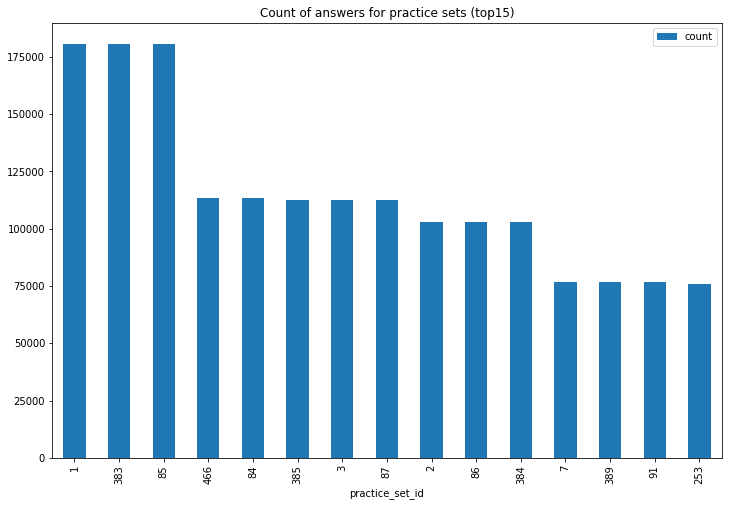

In [218]:
plt.savefig('visualizations/matplotlib/count_of_questions_for_practice_sets.png')
plt.show()

In [219]:
# ps_id, where are practice_sets for vyjmenovana slova po b:
# 1, 2, 3, (85, 86, 87)-otazky, (169, 170)-diktat, 383, 384, 385

def get_vyjmenovana_slova_po_b(crucial_data):
    """input is already without duplicate answers for one particular question from one user"""
    # 1,2,3/85,86,87/383,384,385 seems like the same
    slova_po_b = crucial_data[crucial_data.ps.isin([383,384,385])]
    
    # if some practice sets share the questions
    data = slova_po_b.drop_duplicates(['user','question_id'], keep='first')
    
    return data

In [220]:
slova_po_b = get_vyjmenovana_slova_po_b(crucial_data)

slova_po_b.to_csv('data/processed/vyjmenovana_slova_po_b.csv')